In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load region-product export data

In [2]:
trade = pd.read_parquet('data/cleaned.parquet')
trade.head()

,year,region,prod,export,regionsum,prodsum,yearsum,rca,binrca,pivec_p,pivec_m,pivec_c,pci,pci_m,pci_p,pci_c,pcil_m,pcil_p,pcil_c
0,1962,ABW,001,0.000000,0.000000e+00,6.782654e+08,1.234760e+11,0.000000,0,0.008395,0.002745,0.003898,-0.058055,-2.307477,-0.919122,-1.095074,-0.006335,-0.007716,-0.004269
1,1962,AFG,001,0.000000,8.181017e+07,6.782654e+08,1.234760e+11,0.000000,0,0.008395,0.002745,0.003898,-0.058055,-2.307477,-0.919122,-1.095074,-0.006335,-0.007716,-0.004269
2,1962,AGO,001,9682.848633,1.311828e+08,6.782654e+08,1.234760e+11,0.013437,0,0.008395,0.002745,0.003898,-0.058055,-2.307477,-0.919122,-1.095074,-0.006335,-0.007716,-0.004269
3,1962,AIA,001,0.000000,0.000000e+00,6.782654e+08,1.234760e+11,0.000000,0,0.008395,0.002745,0.003898,-0.058055,-2.307477,-0.919122,-1.095074,-0.006335,-0.007716,-0.004269
4,1962,ALB,001,0.000000,2.301677e+06,6.782654e+08,1.234760e+11,0.000000,0,0.008395,0.002745,0.003898,-0.058055,-2.307477,-0.919122,-1.095074,-0.006335,-0.007716,-0.004269


In [3]:
## function that take the parameter, do linear to log transform and return dataset
def transform(R0,trade):
    df = trade.assign(llrca = np.log(1+trade.rca/R0)/np.log(1+1/R0))
    df['avgrca_part_p'] = df.llrca*df.pivec_p
    df['avgrca_p'] = df.groupby(['year','region'])['avgrca_part_p'].transform(sum)
    df['rct_p'] = np.where(df.avgrca_p>0,df.llrca/df.avgrca_p,0)
    df['rct_demean_p'] = df.rct_p-df.groupby('prod').rct_p.transform('mean')
    df['projpart_demean'] = df.pcil_p*df.rct_demean_p
    df['proj_demean'] = df.groupby(['year','region'])['projpart_demean'].transform(sum)
    df['loading_demean'] = df.proj_demean*df.pci_p
    return (np.square(df.loading_demean).sum(),np.square(df.loading_demean).sum()/np.square(df.rct_demean_p).sum())

In [4]:
## loop over the possible range of parameter
res = np.zeros((40,2))
R0s = 10**np.arange(-8,2,0.25)
for i in range(40):
    res[i,:] = transform(R0s[i],trade)

Text(0, 0.5, 'Var(ECI*) ratio')

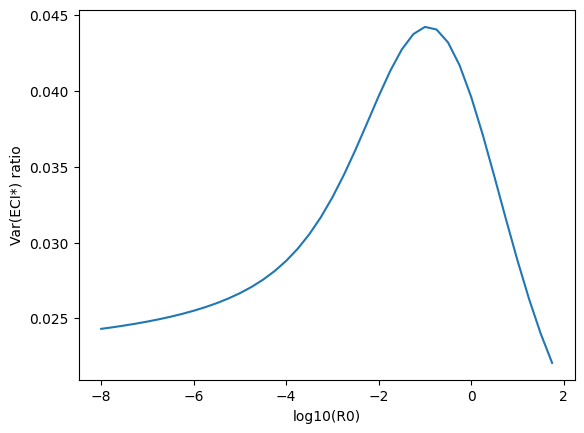

In [5]:
## plot the result
plt.plot(np.log10(R0s),res[:,1])
plt.xlabel("log10(R0)")
plt.ylabel("Var(ECI*) ratio")

R0 = 0.115 at the peak was chosen as parameter for future analysis